In [251]:
import numpy as np
import xarray as xr
from pharynx_analysis import plots, profile_processing
from pathlib import Path
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import distance
import seaborn as sns

In [409]:
meta_dir = Path('/Users/sean/code/wormAnalysis/data/paired_ratio')
datasets = []
mvmt_dfs = []
for dir_ in filter(lambda x: x.is_dir(), meta_dir.iterdir()):
    datasets.append(xr.open_dataarray(list(meta_dir.glob(f'**/*{dir_.stem}*nc'))[0]))
    mvmt_dfs.append(pd.read_csv(list(meta_dir.glob(f'**/*{dir_.stem}*mvmt*csv'))[0]))

In [420]:
all_data = xr.concat(datasets, 'strain')
all_mvmt = pd.concat(mvmt_dfs)

In [418]:
all_mvmt[(all_mvmt.pair == 0) & (all_mvmt.region == 'posterior')].movement

0     0
1     0
2     0
3     3
4     0
     ..
30    0
31    0
32    0
33    0
34    1
Name: movement, Length: 984, dtype: int64

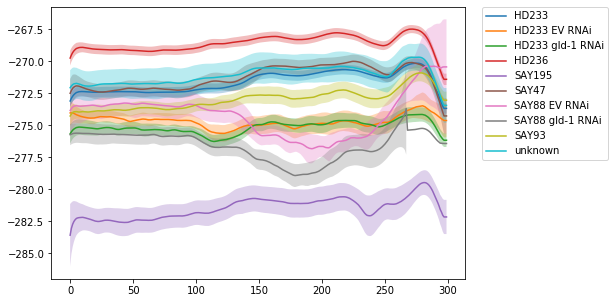

In [497]:
plots.plot_profile_avg_by_strain(all_data.sel(wavelength='e', pair=0));

In [43]:
idxer = list(map(lambda x: x in ['HD233', 'SAY195'], all_data.strain.data))

In [89]:
reg_data = profile_processing.register_profiles(all_data)

(-0.001, 0.005)

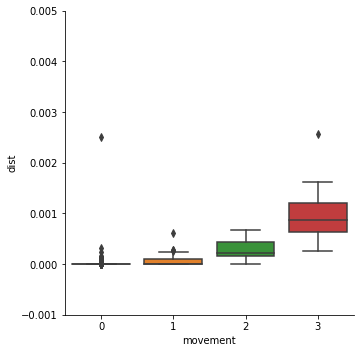

In [496]:
A = all_data.sel(wavelength='410', pair=0)
B = reg_data.sel(wavelength='410', pair=0)

df = pd.DataFrame(columns=['movement', 'dist'])
df.movement = all_mvmt[(all_mvmt.pair == 0) & (all_mvmt.region == 'posterior')].movement
df.dist = distance.cdist(A, B, 'cosine').diagonal()
cp = sns.catplot(x='movement', y='dist', data=df, kind='box')
cp.axes[0,0].set_ylim(-0.001,0.005)

In [492]:
all_mvmt.region == ''

,experiment,animal,movement,pair,region
0,2017_10_12-gld_1_RNAi_SAY88_HD233,0,0,0,posterior
1,2017_10_12-gld_1_RNAi_SAY88_HD233,1,0,0,posterior
2,2017_10_12-gld_1_RNAi_SAY88_HD233,2,0,0,posterior
3,2017_10_12-gld_1_RNAi_SAY88_HD233,3,3,0,posterior
4,2017_10_12-gld_1_RNAi_SAY88_HD233,4,0,0,posterior
5,2017_10_12-gld_1_RNAi_SAY88_HD233,5,0,0,posterior
6,2017_10_12-gld_1_RNAi_SAY88_HD233,6,0,0,posterior
7,2017_10_12-gld_1_RNAi_SAY88_HD233,7,0,0,posterior
8,2017_10_12-gld_1_RNAi_SAY88_HD233,8,0,0,posterior
9,2017_10_12-gld_1_RNAi_SAY88_HD233,9,0,0,posterior
